# Parallel Python with Numba

## Overview of Parallelization Frameworks

* Multiprocessing
* Numpy/Pandas
* Dask
* Joblib
* Numba

#### Multiprocessing
* simple thread or process based queues
* behaves differently on different OS
* reasonable option for fully separate workflows (awkward to communicate between threads/processes)
* BUT, may be better served by writing the serial code in a modular way, and let something like GNU PARALLEL handle the parallelization (scales better)

#### Numpy/Pandas
* perform some system level optimizations based on your hardware and OS
* a lot better than writing loops yourself
* begins really losing out to other options when your matrix sizes grow to about N > 1e4

#### Dask
* abstracts and virtualizes loading and working with Numpy arrays or Pandas dataframes
* delays computation until results are needed (tries to optimize the computation at that point)
* will have WORSE performance than pure Numpy/Pandas until you have about N > 1e6 (or are memory constrained)
* can be awkward to tune correctly
* provides its own datastructures and queues that can be more useful if you design for them (bags, jobarrays)

#### Joblib
* memoize method calls (cache output based on input, for repeatedly used methods)
* queue for embarrassingly parallel tasks (much better than the multiprocessing queue)
* can interact with slurm clusters, supposedly
* might be better served by writing modularized serial code and parallelizing with GNU PARALLEL or similar

#### Numba
* pre-compiles or just-in-time (jit) compiles your methods into optimized machine code
* scales quite well up to about 12 cores
* can auto-paralellize loops (meaning matrix math is better written in loops)
* can auto-paralellize most numpy methods
* just adding annotations can get about 2x performance vs numpy
* writing the code with numba in mind can get about 8x performance vs numpy
* to scale beyond medium sized problems would require use in tandem with Dask/Spark or other

<div>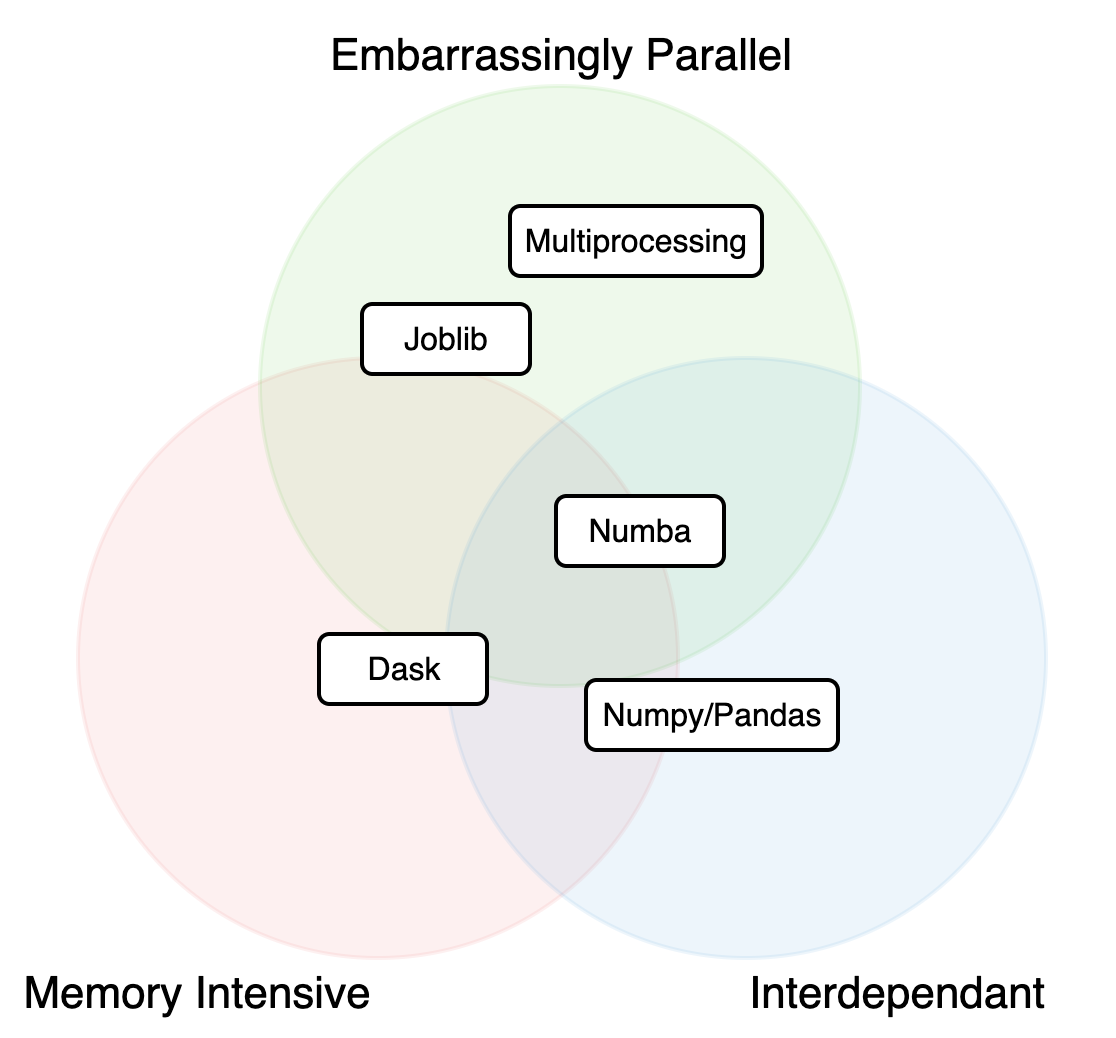</div>

    Show the basic code

In [1]:
import time
from pretty_timer import pretty_timer
from finitevolume import main
from finitevolume_numba import main as main_numba
from finitevolume_optimized import main as main_optimized


### Pure Numpy
* Resolution: 128
* Run time: ~23 seconds


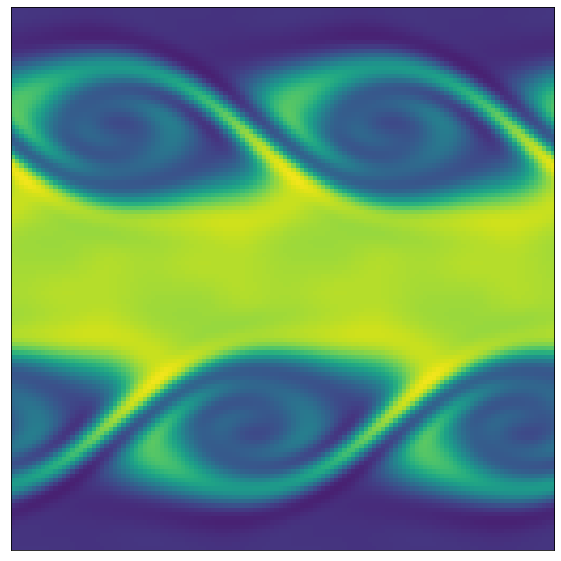

23.232 seconds


In [2]:
start = time.time()
main(128)
print(pretty_timer(time.time() - start))


### Pure Numpy
* Resolution: 256
* Run time: ~1 minute 13 seconds


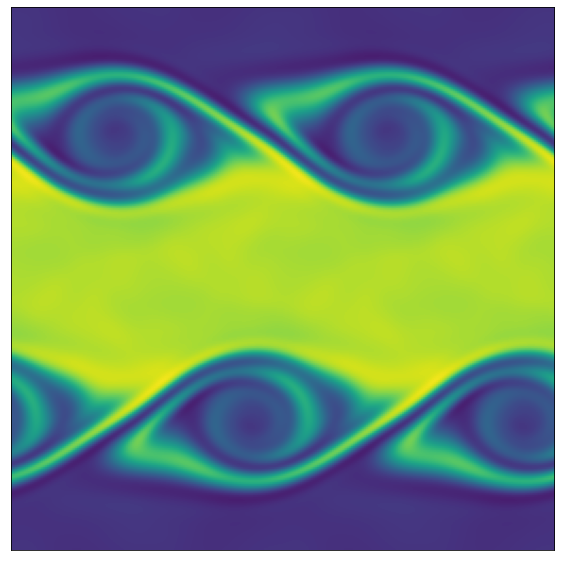

1 minutes and 13 seconds


In [3]:
start = time.time()
main(256)
print(pretty_timer(time.time() - start))


### Pure Numpy
* Resolution: 512
* Run time: ~11 minutes 30 seconds


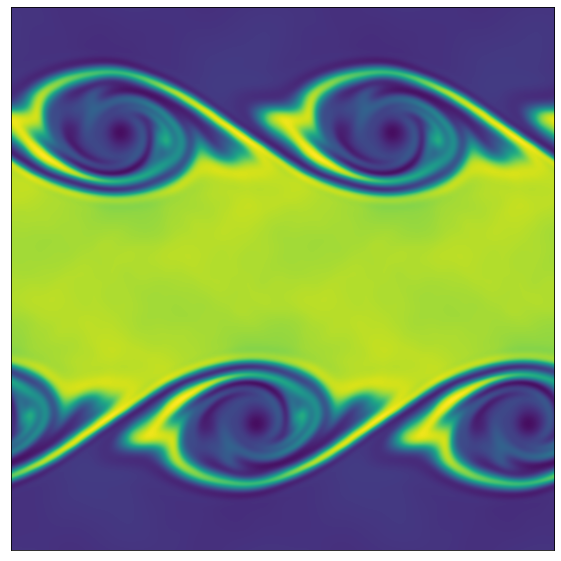

11 minutes and 29 seconds


In [4]:
start = time.time()
main(512)
print(pretty_timer(time.time() - start))


### Pure Numpy
* Resolution: 1024
* Run time: ~2 hours


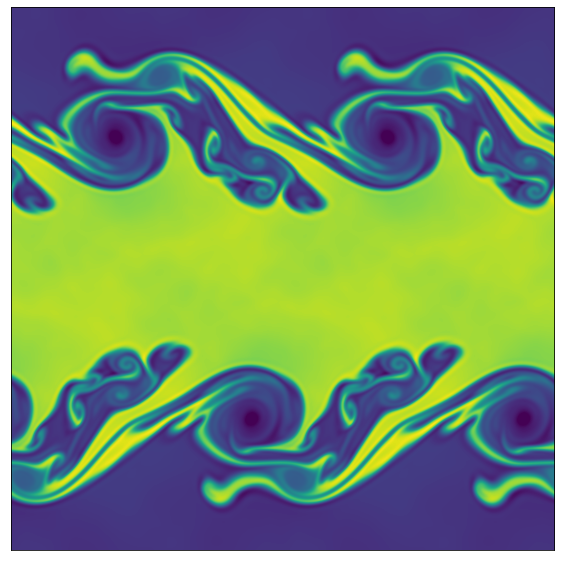

1 hours, 57 minutes, and 7 seconds


In [9]:
start = time.time()
main(1024)II
print(pretty_timer(time.time() - start))

    Show naive numba code


### Naive Numba
* Resolution: 128
* Run time: ~43 seconds


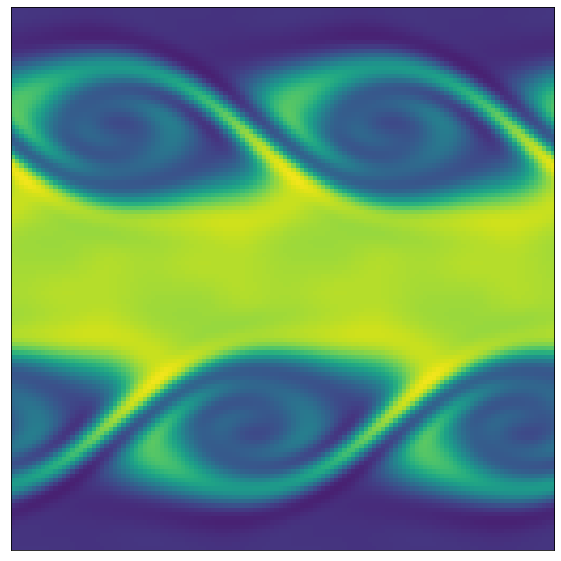

43.152 seconds


In [5]:
start = time.time()
main_numba(128)
print(pretty_timer(time.time() - start))


### Naive Numba
* Resolution: 256
* Run time: ~1 minute 9 seconds


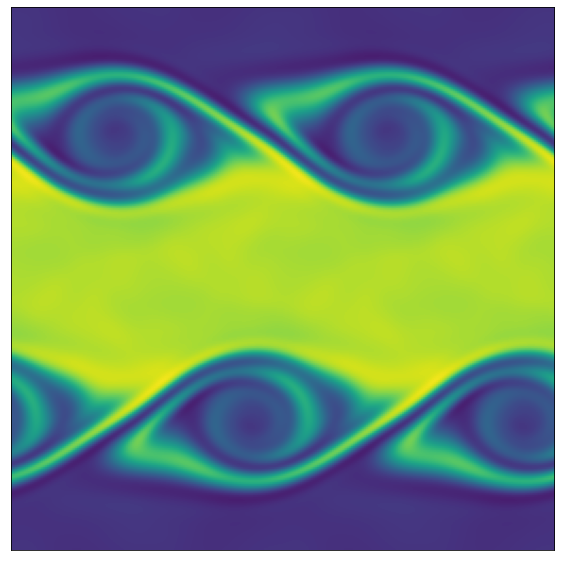

1 minutes and 9 seconds


In [6]:
start = time.time()
main_numba(256)
print(pretty_timer(time.time() - start))


### Naive Numba
* Resolution: 512
* Run time: ~5 minutes 19 seconds


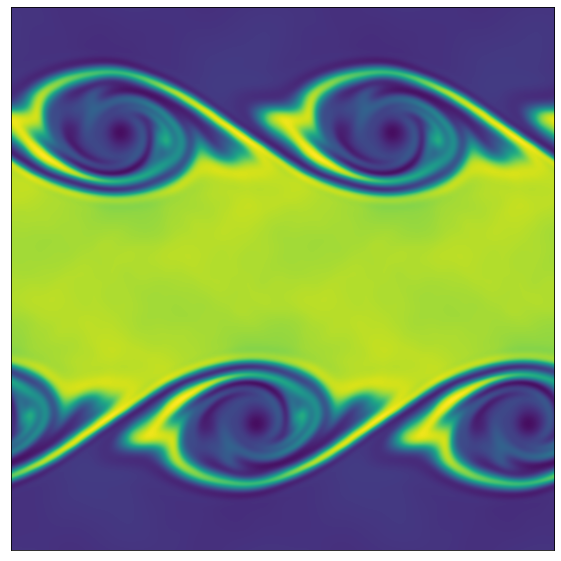

5 minutes and 19 seconds


In [7]:
start = time.time()
main_numba(512)
print(pretty_timer(time.time() - start))


### Naive Numba
* Resolution: 1024
* Run time: ~1 hour


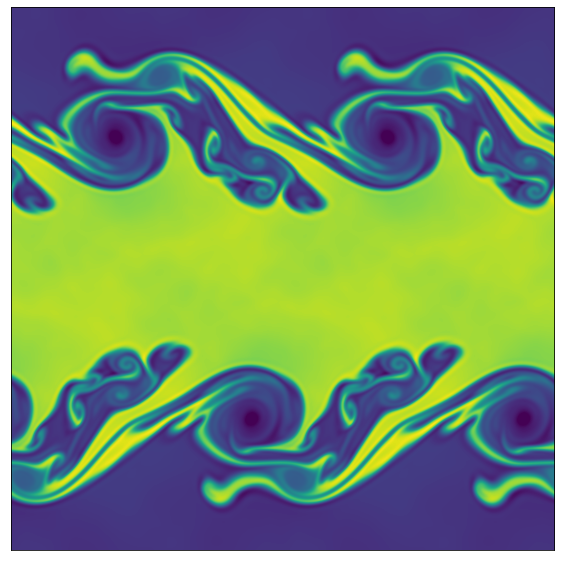

1 hours, 3 minutes, and 32 seconds


In [8]:
start = time.time()
main_numba(1024)
print(pretty_timer(time.time() - start))

    Show optimized numba code


### Optimized Numba
* Resolution: 1024
* Run time: ~15 minutes


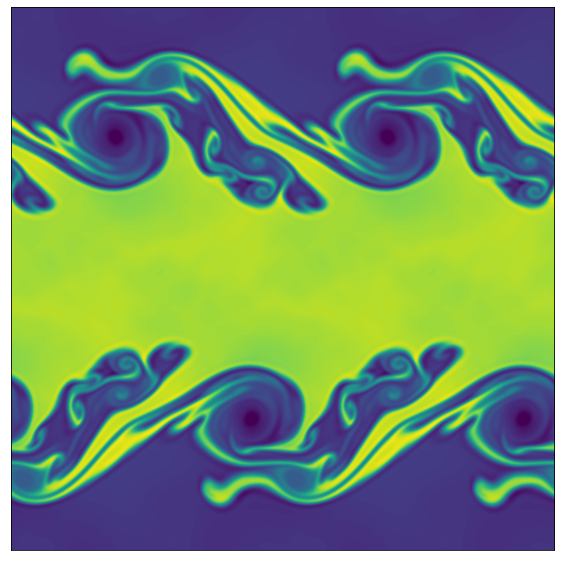

14 minutes and 23 seconds


In [2]:
start = time.time()
main_optimized(1024)
print(pretty_timer(time.time() - start))